In [1]:
# some imports
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf

assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# % matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize=(12, 5))

# Settings for the visualizations
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")
# Others
import cv2
import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from skimage.io import imread
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

In [2]:
import winsound
def beep():
    winsound.Beep(500, 2000)

 ## Import data


In [233]:
# tf.random.set_seed(42)
# np.random.seed(42)

In [3]:
# Paths
X_train_path = './dataset/train/train/train/'
X_test_path = './dataset/test/test/test/'
dataset_csv = './dataset/train.txt'
dataset_csv_test = './dataset/test.txt'
dataset_train = './dataset/train/train'
dataset_test = './dataset/test/test'


In [4]:
_STOP = 20000


def preprocess(img_paths, dataset_path, preprocess_img_method=None):
    print("loading data")
    data = []
    stop = 0
    for img_path in tqdm.tqdm(img_paths):
        path = os.path.realpath(os.path.join(dataset_path, img_path[1:]))
        img = imread(path)
        if preprocess_img_method:
            img = preprocess_img_method(img)
        else:
            # img = cv2.resize(img,(224,224),cv2.INTER_AREA)
            img = img / 255.  #normalize
        data.append(img)
        stop += 1
        if (stop == _STOP):
            break
    print("loading data done")
    return data


def preprocess_img_vgg(img):
    return preprocess_input(img)


In [5]:
df = pd.read_csv(dataset_csv, delimiter='\ ', header=None)
y_train_full = np.array(df[1])[:_STOP]
img_paths = df[0]
X_train_full = preprocess(df[0], dataset_train, preprocess_img_method=None)
X_train_full = np.stack(X_train_full)

C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


loading data


100%|██████████| 15000/15000 [00:17<00:00, 847.82it/s]


loading data done


In [23]:
from collections import Counter
cnt = Counter(y_train_full)
print(cnt)

Counter({3: 558, 10: 536, 5: 528, 15: 522, 8: 522, 6: 518, 9: 518, 13: 515, 28: 515, 4: 514, 25: 512, 16: 511, 0: 508, 20: 504, 22: 504, 2: 495, 23: 495, 18: 493, 29: 493, 11: 489, 7: 484, 14: 484, 19: 484, 27: 483, 26: 479, 12: 472, 17: 471, 24: 469, 21: 463, 1: 461})


In [24]:
# sorted(cnt)
[(k,l) for k,l in sorted([(i,j) for i,j in cnt.items()], reverse=False)]

[(0, 508),
 (1, 461),
 (2, 495),
 (3, 558),
 (4, 514),
 (5, 528),
 (6, 518),
 (7, 484),
 (8, 522),
 (9, 518),
 (10, 536),
 (11, 489),
 (12, 472),
 (13, 515),
 (14, 484),
 (15, 522),
 (16, 511),
 (17, 471),
 (18, 493),
 (19, 484),
 (20, 504),
 (21, 463),
 (22, 504),
 (23, 495),
 (24, 469),
 (25, 512),
 (26, 479),
 (27, 483),
 (28, 515),
 (29, 493)]

In [ ]:
no_classes = np.max(y_train_full) + 1

In [238]:
# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.1)
X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")
y_train = y_train.astype("float32")
y_valid = y_valid.astype("float32")
# X_valid_test = np.array([x[np.newaxis,:,:] for x in X_valid])
X_valid_test = X_valid
y_valid_test = y_valid

In [239]:
print(X_train[0].shape)
print(X_train[0])
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))
print(len(X_train))
print(X_train[0].shape)
print(type(X_train))
print(X_train.shape)

print(type(X_train[0]))
print(y_train[:10])

(158, 158)
[[0.45490196 0.4        0.42745098 ... 0.30588236 0.24313726 0.33333334]
 [0.33333334 0.34509805 0.47058824 ... 0.35686275 0.23529412 0.37254903]
 [0.41960785 0.4117647  0.4745098  ... 0.38431373 0.30588236 0.34117648]
 ...
 [0.49803922 0.5294118  0.5372549  ... 0.8        0.7882353  0.8509804 ]
 [0.5568628  0.54509807 0.5568628  ... 0.7921569  0.7647059  0.8509804 ]
 [0.5568628  0.57254905 0.59607846 ... 0.83137256 0.7764706  0.9019608 ]]
13500
13500
1500
1500
13500
(158, 158)
<class 'numpy.ndarray'>
(13500, 158, 158)
<class 'numpy.ndarray'>
[15. 22. 24. 11. 22. 25. 23.  5. 16. 10.]


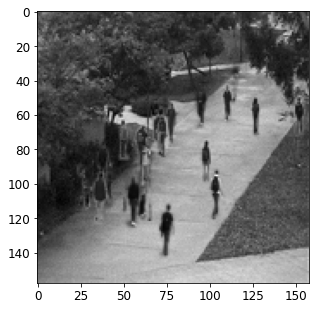

In [240]:
plt.imshow(X_train[1], cmap='gray')


## Model



In [2]:
def get_uncompiled_model():
    input = tf.keras.layers.Input(shape=(158, 158))

    # S
    s = tf.keras.layers.Reshape([158, 158, 1], input_shape=[158, 158])(input)
    s = tf.keras.layers.BatchNormalization()(s)
    s = tf.keras.layers.Conv2D(24, kernel_size=5, padding="SAME", activation="selu", kernel_initializer="he_normal")(s)
    s = tf.keras.layers.MaxPool2D(pool_size=2)(s)
    s = tf.keras.layers.BatchNormalization()(s)
    s = tf.keras.layers.Conv2D(48, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal")(s)
    s = tf.keras.layers.MaxPool2D(pool_size=2)(s)
    s = tf.keras.layers.BatchNormalization()(s)
    s = tf.keras.layers.Conv2D(24, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal")(s)
    s = tf.keras.layers.BatchNormalization()(s)
    s = tf.keras.layers.Conv2D(12, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal")(s)
    s = tf.keras.layers.BatchNormalization()(s)

    # M
    m = tf.keras.layers.Reshape([158, 158, 1], input_shape=[158, 158])(input)
    m = tf.keras.layers.BatchNormalization()(m)
    m = tf.keras.layers.Conv2D(20, kernel_size=7, padding="SAME", activation="selu", kernel_initializer="he_normal")(m)
    m = tf.keras.layers.MaxPool2D(pool_size=2)(m)
    m = tf.keras.layers.BatchNormalization()(m)
    m = tf.keras.layers.Conv2D(40, kernel_size=5, padding="SAME", activation="selu", kernel_initializer="he_normal")(m)
    m = tf.keras.layers.MaxPool2D(pool_size=2)(m)
    m = tf.keras.layers.BatchNormalization()(m)
    m = tf.keras.layers.Conv2D(20, kernel_size=5, padding="SAME", activation="selu", kernel_initializer="he_normal")(m)
    m = tf.keras.layers.BatchNormalization()(m)
    m = tf.keras.layers.Conv2D(10, kernel_size=5, padding="SAME", activation="selu", kernel_initializer="he_normal")(m)
    m = tf.keras.layers.BatchNormalization()(m)

    # H
    h = tf.keras.layers.Reshape([158, 158, 1], input_shape=[158, 158])(input)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Conv2D(16, kernel_size=9, padding="SAME", activation="selu", kernel_initializer="he_normal")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=2)(h)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Conv2D(32, kernel_size=7, padding="SAME", activation="selu", kernel_initializer="he_normal")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=2)(h)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Conv2D(16, kernel_size=7, padding="SAME", activation="selu", kernel_initializer="he_normal")(h)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Conv2D(8, kernel_size=7, padding="SAME", activation="selu", kernel_initializer="he_normal")(h)
    h = tf.keras.layers.BatchNormalization()(h)

    enc = concatenate([h, m, s])
    output = tf.keras.layers.Conv2D(1, kernel_size=(1, 1), padding='same')(enc)
    output = tf.keras.layers.MaxPool2D(pool_size=2)(output)
    output = tf.keras.layers.Flatten(name="flatten1")(output)
    output = tf.keras.layers.Dense(512, activation="selu", kernel_initializer="he_normal")(output)
    output = tf.keras.layers.Dropout(0.5)(output)
    output = tf.keras.layers.Dense(256, activation="selu", kernel_initializer="he_normal")(output)
    output = tf.keras.layers.Dropout(0.4)(output)
    output = tf.keras.layers.Dense(128, activation="selu", kernel_initializer="he_normal")(output)
    output = tf.keras.layers.Dense(1, activation="linear", name="prediction")(output)

    model = Model(inputs=input, outputs=output)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    nadam = tf.keras.optimizers.Nadam(lr=0.0005, beta_1=0.9, beta_2=0.999)
    rmse = rmse_loss
    model.compile(
        optimizer=nadam,  # Optimizer
        # Loss function to minimize
        loss=rmse,
        # List of metrics to monitor
        metrics=["accuracy", root_mean_squared_error]
    )
    return model

#TODO
# model = keras.models.Sequential([conv_encoder, conv_decoder])

In [4]:
model = get_uncompiled_model()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 158, 158)]   0                                            
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 158, 158, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 158, 158, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 158, 158, 1)  0           input_2[0][0]                    
_______________________________________________________________________________________

In [242]:
def rmse_loss(y_true, y_pred):
    return tf.sqrt((tf.math.reduce_mean(tf.square(tf.cast(y_pred, tf.float64) - tf.cast(y_true, tf.float64)))))

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y_pred - y_true)), tf.float64))

In [243]:
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        # print(str(y_true)," - " , str(y_pred))
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor

In [268]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = "./ckpt/cc-2-mcnn-r"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]

    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()


def make_or_restore_model_weights_only_uncompiled():
    model = get_uncompiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    if latest:
        model.load_weights(latest)
        print("Restoring from", latest)
    return model

def make_or_restore_model_weights_only_compiled():
    model = get_compiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    if latest:
        model.load_weights(latest)
        print("Restoring from", latest)
    return model

def restore_model():
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)


def restore_model_weights_only():
    model = get_uncompiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    print("Restoring from", latest)
    model.load_weights(latest)
    return model


def restore_model_weights_only_uncompiled():
    model = get_uncompiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    print("Restoring from", latest)
    model.load_weights(latest)
    return model


### Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# configure early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
###

### Model saving
model_saving = keras.callbacks.ModelCheckpoint(
    # Path where to save the model
    # The two parameters below mean that we will overwrite
    # the current checkpoint if and only if
    # the `val_loss` score has improved.
    # The saved model name will include the current epoch.
    filepath=checkpoint_dir + "/val_loss={val_loss:.3f}_loss={loss:.3f}_rmse={val_root_mean_squared_error:.3f}_ckpt={epoch}",
    save_best_only=True,  # Only save a model if `val_loss` has improved.
    monitor="val_root_mean_squared_error",
    save_weights_only=True,
    mode="min",
    verbose=1,
)
###

### init callbacks
callbacks = [
    model_saving,
    early_stopping
]

In [245]:
model = get_compiled_model()
model.summary()

Model: "functional_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 158, 158)]   0                                            
__________________________________________________________________________________________________
reshape_100 (Reshape)           (None, 158, 158, 1)  0           input_25[0][0]                   
__________________________________________________________________________________________________
reshape_99 (Reshape)            (None, 158, 158, 1)  0           input_25[0][0]                   
__________________________________________________________________________________________________
reshape_98 (Reshape)            (None, 158, 158, 1)  0           input_25[0][0]                   
______________________________________________________________________________________

In [288]:
model = make_or_restore_model_weights_only_uncompiled()
# model = get_uncompiled_model()
# optimizer
adam = tf.keras.optimizers.Adam(lr=1e-4)
rmsprops = tf.keras.optimizers.RMSprop(lr=0.0005, rho=0.9)
nadam = tf.keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
sgd = tf.keras.optimizers.SGD(lr=1e-5, decay=(1 * 1e-5), momentum=0.95, nesterov=True)

# LOSS
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
rmse = rmse_loss
model.compile(
    optimizer=rmsprops,  # Optimizer
    # Loss function to minimize
    loss=rmse,
    # List of metrics to monitor
    metrics=[root_mean_squared_error]
)
# model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=['loss'])#['accuracy','mse'])

Restoring from ./ckpt/cc-2-mcnn-r\val_loss=1.300_loss=1.500_rmse=1.298_ckpt=15


Fit model on training data
Epoch 1/100
338/338 [==============================] - ETA: 0s - loss: 1.4767 - root_mean_squared_error: 1.4773 

<AxesSubplot:>

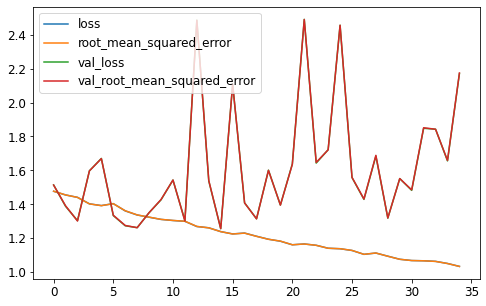

In [287]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # validation_data=(X_valid, y_valid),
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks
)
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Tests

In [273]:
# TEST RMSE for best model
model = restore_model_weights_only()  # Restore Model
n = len(y_valid_test)
preds = model.predict(X_valid_test)
preds = [item for sublist in preds for item in sublist]
# preds = np.array([np.rint(pred) for pred in preds])
preds = np.array(preds)
vals = np.array(y_valid_test[:n])
rmse = [np.sqrt(np.sum(np.square(preds[:n] - vals[:n])) / n)]
print(rmse)
beep()

Restoring from ./ckpt/cc-2-mcnn-r\val_loss=1.255_loss=1.223_rmse=1.255_ckpt=32
[1.213869434455885]


In [56]:
print(rmse)



[3.8075188771692257]


In [ ]:
# Save Model

In [274]:
model = restore_model_weights_only()  # Restore Model
model.save('./ckpt/full_saves/2-mcnn-reg-v2/', save_format='tf')

INFO:tensorflow:Assets written to: ./ckpt/full_saves/2-mcnn-reg-v2/assets


In [277]:
model = tf.keras.models.load_model('./ckpt/full_saves/2-mcnn-reg-v2/')
model.compile(
    optimizer=nadam,  # Optimizer
    # Loss function to minimize
    loss=rmse,
    # List of metrics to monitor
    metrics=[root_mean_squared_error]
)

In [280]:
## TEST restore weights
# model = make_or_restore_model_weights_only_compiled()
# Re-evaluate the model
loss, rmse = model.evaluate(X_valid, y_valid, verbose=2)
print("Restored model, rmse: {:.5f}".format(rmse))

ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1177 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\util\nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\util\nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\losses.py:1902 get
        'Could not interpret loss function identifier: {}'.format(identifier))

    ValueError: Could not interpret loss function identifier: 1.213869434455885


## Submission

In [184]:
# Submission
df_test = pd.read_csv(dataset_csv_test, delimiter='\ ', header=None)
print(df_test)

                                     0
0    /test/test_composite000000001.png
1    /test/test_composite000000000.png
2    /test/test_composite000000002.png
3    /test/test_composite000000003.png
4    /test/test_composite000000004.png
..                                 ...
495  /test/test_composite000000495.png
496  /test/test_composite000000496.png
497  /test/test_composite000000497.png
498  /test/test_composite000000498.png
499  /test/test_composite000000499.png

[500 rows x 1 columns]


C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [204]:
X_test_full = preprocess(df_test[0], dataset_test, preprocess_img_method=None)
X_test_full = np.stack(X_test_full)

loading data


100%|██████████| 500/500 [00:00<00:00, 1327.10it/s]

loading data done


In [223]:
#Predict
predictions = model.predict(X_test_full)
predictions = [item for sublist in predictions for item in sublist]
# predictions = [int(np.rint(pred)) for pred in preds]

In [224]:
print(predictions)

[21.845985, 24.297573, 12.470282, 24.91128, 24.51133, 11.739797, 26.62404, 24.142466, 1.5107586, 8.262858, 19.293348, 2.3958824, 5.053854, 22.401052, 17.380896, 5.9393005, 8.272136, 2.8558378, 26.853287, 15.088848, 4.3045173, 19.293962, 25.205908, 13.322419, 16.298803, 0.030411258, 4.8539295, 2.592613, 8.842841, 2.5759828, 8.779315, 22.868082, 12.1628475, 19.918697, 27.953049, 0.3201972, 15.273489, 8.771863, 2.1974397, 5.8973236, 14.790232, 17.988554, 6.372977, 27.21505, 15.979375, 19.527063, 14.49398, 28.58686, 2.5077043, 18.270943, 25.378265, 3.734848, 23.130905, 7.5730786, 1.147495, 25.787977, 4.7003994, 12.690822, 18.89526, 27.031946, 22.321768, 18.505877, 20.956858, 1.6226501, 4.3372602, 12.783427, 0.09342481, 3.178581, 9.445731, 13.090926, 20.979431, 1.7393413, 0.18276478, 10.133779, 30.607376, 8.00362, 7.723692, 13.74519, 13.06579, 26.204264, 5.1264734, 19.383095, 29.701473, 22.249298, 2.0372303, 22.270584, 26.710339, 28.067333, 22.36548, 20.64034, 20.224136, 21.847528, 30.57226

In [225]:
indexes = []
for i in range(len(predictions)):
    indexes.append(i)

In [214]:
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [226]:
import pandas

df = pandas.DataFrame(data={"index": indexes, "prediction": predictions})
df.to_csv("./sub-2-c-r.csv", sep=',', index=False)